In [2]:
import matplotlib.pyplot as plt
import numpy as np

from dsignal import Signal, impseq, stepseq

%matplotlib inline

In [2]:
x = 2 * impseq(-2, -5, 5) - impseq(4, -5, 5)
print(x)

t: [-5 -4 -3 -2 -1  0  1  2  3  4  5]
x: [ 0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0.]


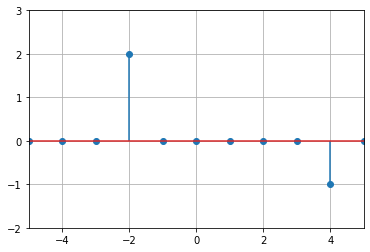

In [3]:
plt.stem(x.time, x.value)
ax = plt.gca()
ax.set_xlim([-5, 5])
ax.set_ylim([-2,3])
ax.grid()

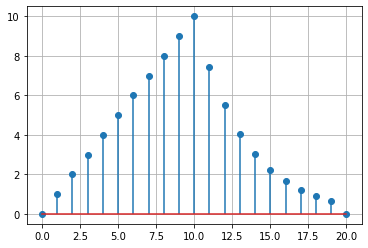

In [14]:
n = np.arange(0, 21)
x1 = (stepseq(0,0,20) - stepseq(10,0,20)) * n
x2 = (stepseq(10,0,20) - stepseq(20,0,20)) * 10 * np.exp(-0.3*(n-10))
x = x1 + x2
plt.stem(x.time, x.value)
ax = plt.gca()
ax.grid()

In [3]:
x = stepseq(0, -1, 1)
print(x.tile(3))

t: [-1  0  1]
x: [0. 1. 1.]
t: [-1  0  1  2  3  4  5  6  7]
x: [0. 1. 1. 0. 1. 1. 0. 1. 1.]
